In [276]:

import warnings
import sys
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import sys
%run Securities.py

In [277]:
tech_tickers = ["TSLA", "AMZN"]

In [278]:
securities = Returns_analysis(tech_tickers, start_date = "2010-1-1")

In [279]:
securities.download_stocks_closing(column_name = "Adj Close", fill_method = "forward")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,AMZN
Date,,
2010-06-29,1.592667,5.430500
2010-06-30,1.588667,5.463000
2010-07-01,1.464000,5.548000
2010-07-02,1.280000,5.457000
2010-07-06,1.074000,5.503000
...,...,...
2023-02-13,194.639999,99.540001
2023-02-14,209.250000,99.699997
2023-02-15,214.240005,101.160004


In [280]:
securities.fill_values("backward")

,TSLA,AMZN
Date,,
2010-06-29,1.592667,5.430500
2010-06-30,1.588667,5.463000
2010-07-01,1.464000,5.548000
2010-07-02,1.280000,5.457000
2010-07-06,1.074000,5.503000
...,...,...
2023-02-13,194.639999,99.540001
2023-02-14,209.250000,99.699997
2023-02-15,214.240005,101.160004


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


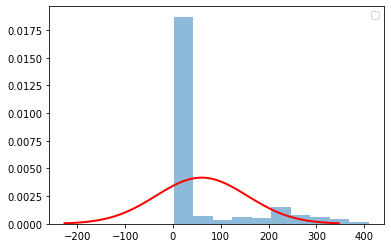

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


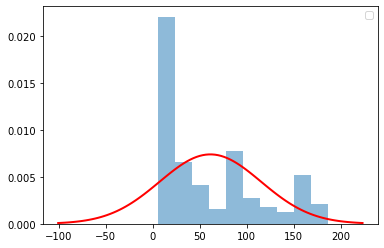

In [281]:
securities.data_distribution()

<AxesSubplot: title={'center': 'Growth Comparison of Stocks'}, xlabel='Date'>

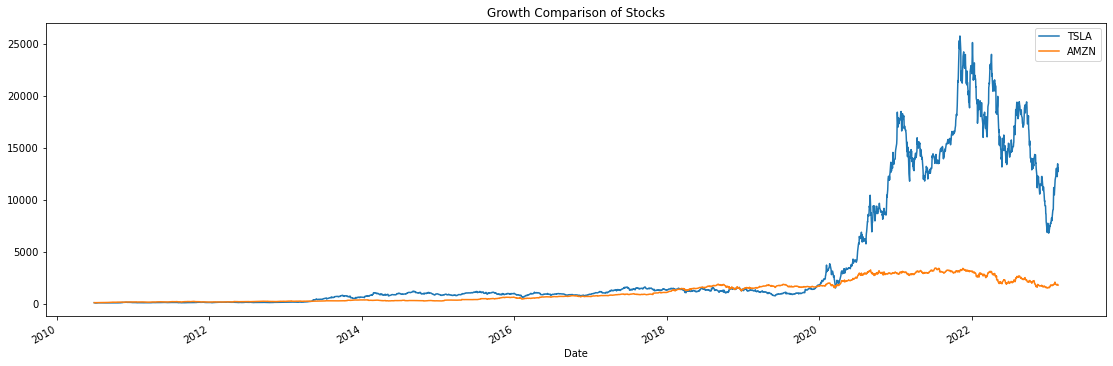

In [282]:
securities.normalization()

In [283]:
securities.get_returns("Simple")

,TSLA,AMZN
Date,,
2010-06-29,NaN,NaN
2010-06-30,-0.002511,0.005985
2010-07-01,-0.078473,0.015559
2010-07-02,-0.125683,-0.016402
2010-07-06,-0.160937,0.008430
...,...,...
2023-02-13,-0.011428,0.019773
2023-02-14,0.075062,0.001607
2023-02-15,0.023847,0.014644


In [284]:
securities.individual_return()

The Simple return of the stocks are TSLA    54.59
AMZN    28.09
dtype: float64


In [285]:
securities.individual_risk_factor()

             0
TSLA  0.571971
AMZN  0.329620
The lowest risk factor is0    0.32962
dtype: float64
